<center style><h3>Computer Assignment 5 - phase 1</h3></center>
<center style><h4>CNN - Image Classification CIFAR10</h4></center>
 <h4 style="text-align:right">
        محمد پویا افشاری - 810198577
</h4>




#CNN on CIFAR-10



CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

# Part 0: Prepare data

In [1]:
import sys
sys.path.append("..")


In [2]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
!pip install keras_utils


2.12.0
2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras_utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2634 sha256=36052d351a3b6fdcfdaa10c7af602f8d6b05ed5c33628fce0ddb64af47ebbb14
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras_utils


In [3]:
import keras_utils
from tensorflow.keras.utils import to_categorical

### Load dataset

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [7]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

### show random images from train

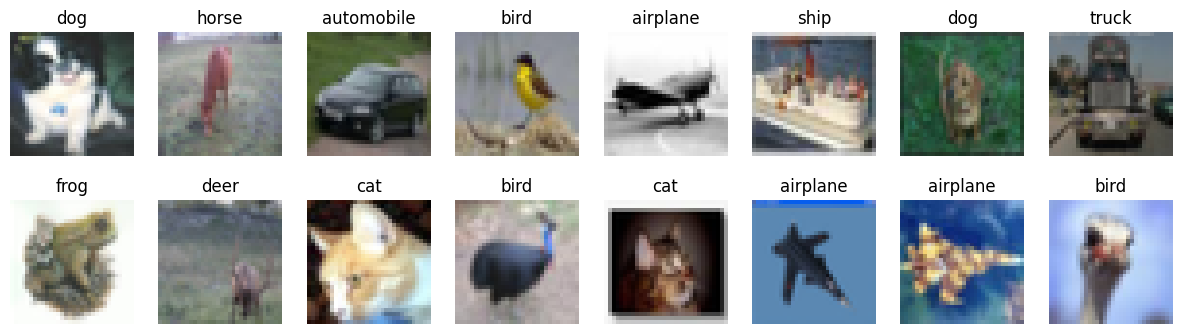

In [ ]:

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

### Prepare data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$


In [8]:
# normalize inputs
x_train2 = (x_train / 255) - 0.5
x_test2 = (x_test / 255) - 0.5


We need to convert class labels to one-hot encoded vectors. Use __keras.utils.to_categorical__.

In [9]:
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

Part 1: Image classification using a CNN network

### Define CNN architecture

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import ELU, PReLU, LeakyReLU
from keras.optimizers import Adam


A sequential model:

In [12]:
def make_model():
    #cnn
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # model.add(Conv2D(32, (3, 3), padding='same'))
    # model.add(LeakyReLU(0.1))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
 
    # model.add(Conv2D(32, (3, 3), padding='same'))
    # model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    #dense
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dense(256))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [13]:
model = make_model()
# model.summary()

### Train model

During training we  observe the decrease in reported loss on training and validation.

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:

model.fit(x_train2, y_train2, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.1584 - accuracy: 0.5853
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7383 - accuracy: 0.7417
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4512 - accuracy: 0.8417
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2439 - accuracy: 0.9165
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1573 - accuracy: 0.9471
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1244 - accuracy: 0.9573
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1095 - accuracy: 0.9635
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0943 - accuracy: 0.9695
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0907 - accuracy: 0.9704
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.08

In [17]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

In [18]:
# save weights to file
model.save_weights("weights.h5")

In [19]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

### Evaluate model

In [22]:
model.evaluate(x_test2,y_test2)

313/313 [==============================] - 1s 3ms/step - loss: 1.9495 - accuracy: 0.6853


[1.949462652206421, 0.6852999925613403]

In [23]:
# make test predictions
y_pred = model.predict(x_test2)
y_pred[:5]


313/313 [==============================] - 1s 2ms/step


array([[6.18159947e-06, 7.69091421e-04, 7.35221988e-07, 6.78060949e-01,
        1.33531925e-04, 1.27180014e-03, 1.16805913e-05, 1.13694526e-07,
        2.84031928e-01, 3.57140452e-02],
       [1.99632370e-03, 9.96441424e-01, 9.05708875e-20, 7.84719832e-21,
        1.48609974e-21, 2.09689720e-20, 2.85193109e-19, 8.44425188e-22,
        6.25420304e-04, 9.36802768e-04],
       [5.47584612e-04, 6.16152305e-04, 2.50737635e-08, 8.27343465e-05,
        1.74323311e-09, 5.28292722e-11, 7.45641951e-11, 2.39146347e-09,
        9.98705745e-01, 4.76979330e-05],
       [1.06311170e-03, 3.22761275e-06, 1.59651478e-07, 4.55142896e-10,
        2.19191816e-06, 9.03926847e-12, 6.48227996e-08, 1.54278784e-10,
        9.98729169e-01, 2.02021823e-04],
       [1.77959472e-17, 5.85307972e-17, 8.91563039e-12, 1.81344913e-05,
        1.15971133e-01, 1.32745315e-10, 8.84010792e-01, 1.17387616e-20,
        5.90925353e-14, 1.37021648e-16]], dtype=float32)

In [24]:
y_test_original = np.argmax(y_test2, axis=1)
y_pred_original = np.argmax(y_pred, axis=1)


In [25]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test_original, y_pred_original))


Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.83      0.79      0.81      1000
           2       0.62      0.51      0.56      1000
           3       0.51      0.49      0.50      1000
           4       0.60      0.69      0.64      1000
           5       0.61      0.58      0.59      1000
           6       0.71      0.77      0.74      1000
           7       0.81      0.68      0.74      1000
           8       0.76      0.82      0.79      1000
           9       0.68      0.84      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



 loss and accuracy shown on confusion matrix

Accuracy: 0.6853


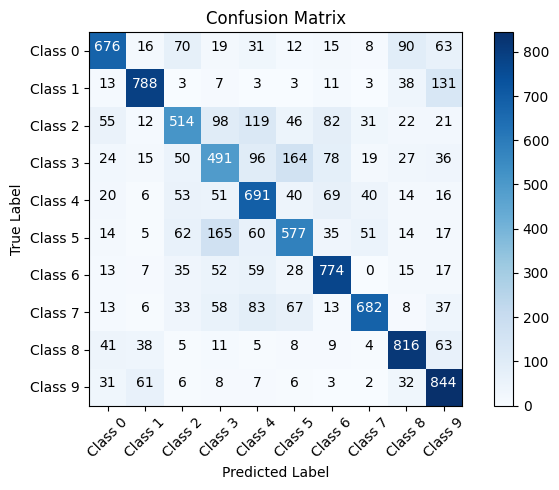

In [26]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_original, y_pred_original)

# Calculate accuracy score
accuracy = accuracy_score(y_test_original, y_pred_original)

# Print accuracy score
print("Accuracy:", accuracy)

# Visualize confusion matrix
plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numerical values in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### 1. Briefly explain how the Adam optimizer works and how it differs from the SGD optimizer


The Adam optimizer is an adaptive learning rate optimization algorithm commonly used in deep learning. It combines ideas from the AdaGrad and RMSProp algorithms to achieve efficient and effective optimization.

Here's a brief explanation of how the Adam optimizer works:

- Initialization: Adam initializes the first and second moments (m and v) as zero vectors.

- Computing gradients: In each training iteration, the gradients of the model parameters are computed using the current mini-batch of training data.

- Updating the moments: The first moment (m) is updated using a decaying average of the gradients, and the second moment (v) is updated using a decaying average of the squared gradients. These updates help keep track of the mean and variance of the gradients.

- Bias correction: Since the moments are initialized as zero vectors, they have a bias towards zero in the early training stages. To counter this bias, Adam performs bias correction by scaling the moments in the first few iterations.

- Parameter update: The model parameters are updated using the computed gradients and the scaled moments. The learning rate, which determines the step size of the parameter update, is adaptively adjusted based on the magnitudes of the moments.
----
The Adam optimizer differs from the SGD (Stochastic Gradient Descent) optimizer in several ways:

- Adaptive learning rate: Adam adapts the learning rate for each parameter individually based on the estimated first and second moments, while SGD uses a fixed learning rate throughout the training process.

- Momentum: Adam incorporates momentum by maintaining and updating the first moment (m). This helps accelerate the optimization process by carrying information from previous updates. SGD can also include momentum, but it needs to be explicitly specified.

- Learning rate schedules: Adam adapts the learning rate based on the moments, which can result in more efficient convergence. SGD often requires manual tuning of the learning rate schedule.

- Handling sparse gradients: Adam performs well even in the presence of sparse gradients, making it suitable for models with large parameter spaces or natural language processing tasks. SGD, on the other hand, can struggle with sparse gradients and may require additional techniques like learning rate annealing.

> It often converges faster and requires less manual tuning compared to SGD, especially in scenarios with sparse gradients or large parameter spaces.

# Part 2: Network training with unbalanced data

In [27]:
from sklearn.utils import shuffle


In [29]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Indices of the airplane and automobile classes
airplane_indices = np.where(y_train == 0)[0]
automobile_indices = np.where(y_train == 1)[0]

# Shuffle the indices
np.random.shuffle(airplane_indices)
np.random.shuffle(automobile_indices)

# Calculate the number of samples to drop (80% of the original size)
num_samples_to_drop = int(0.8 * len(airplane_indices))

# Drop samples from airplane class
x_train3 = np.delete(x_train2, airplane_indices[:num_samples_to_drop], axis=0)
y_train3 = np.delete(y_train2, airplane_indices[:num_samples_to_drop], axis=0)

# Drop samples from automobile class
x_train3 = np.delete(x_train2, automobile_indices[:num_samples_to_drop], axis=0)
y_train3 = np.delete(y_train2, automobile_indices[:num_samples_to_drop], axis=0)


In [30]:
model1 = make_model()


In [31]:
# Compile the original model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [32]:

model1.fit(x_train3, y_train3, epochs=10)


Epoch 1/10
1438/1438 [==============================] - 9s 5ms/step - loss: 1.1976 - accuracy: 0.5746
Epoch 2/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.7673 - accuracy: 0.7321
Epoch 3/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.4716 - accuracy: 0.8346
Epoch 4/10
1438/1438 [==============================] - 7s 5ms/step - loss: 0.2443 - accuracy: 0.9149
Epoch 5/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.1553 - accuracy: 0.9467
Epoch 6/10
1438/1438 [==============================] - 7s 5ms/step - loss: 0.1274 - accuracy: 0.9560
Epoch 7/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.1063 - accuracy: 0.9651
Epoch 8/10
1438/1438 [==============================] - 9s 6ms/step - loss: 0.0915 - accuracy: 0.9702
Epoch 9/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.0888 - accuracy: 0.9708
Epoch 10/10
1438/1438 [==============================] - 8s 5ms/step - loss: 0.082

In [63]:
y_pred2 = model1.predict(x_test2)
y_test_original2 = np.argmax(y_test2, axis=1)
y_pred_original2 = np.argmax(y_pred2, axis=1)


313/313 [==============================] - 1s 3ms/step


Accuracy: 0.6651


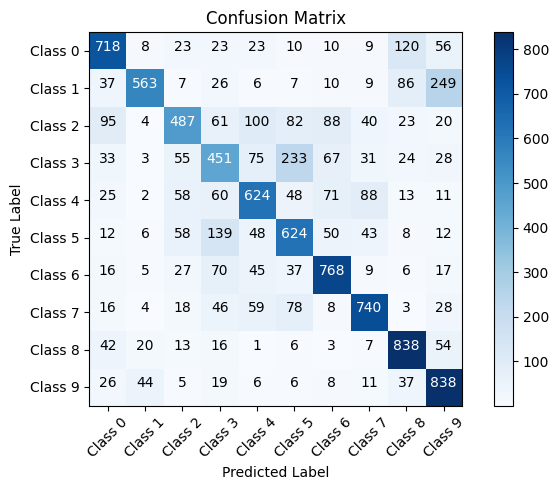

In [67]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_original2, y_pred_original2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_original2, y_pred_original2)

# Print accuracy score
print("Accuracy:", accuracy)

# Visualize confusion matrix
plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numerical values in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

We see decrease in terms of Accuracy when we dropped 80% of samples in class 0 and 1. 
Also here data will be oriented mostly on other classes if we get results.

In [38]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:04d}.hdf5'
last_finished_epoch = None

In [39]:
# save weights to file
model1.save_weights("weights1.h5")

In [40]:
# load weights from file (can call without model.fit)
model1.load_weights("weights1.h5")

In [64]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test_original2, y_pred_original2))


Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.85      0.56      0.68      1000
           2       0.65      0.49      0.56      1000
           3       0.50      0.45      0.47      1000
           4       0.63      0.62      0.63      1000
           5       0.55      0.62      0.59      1000
           6       0.71      0.77      0.74      1000
           7       0.75      0.74      0.74      1000
           8       0.72      0.84      0.78      1000
           9       0.64      0.84      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



Here we see we get decrease in terms of precision, f1-score, accuracy, and averages. which is true based on we dropped of some of the samples and made dataset unbalaced.

#Part 3: Using Augmentation Data to balance the number of data

---



To increase the number of samples in the "plane" and "car" classes using data augmentation techniques such as random zoom, random flip, and random rotation, you can utilize the `ImageDataGenerator` class from Keras.

In [41]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Generate augmented data for airplane class
airplane_indices = np.where(y_train == 0)[0]
x_airplane = x_train2[airplane_indices]
y_airplane = y_train2[airplane_indices]

augmented_airplane_data = []
for i in range(num_samples_to_drop):
    augmented_img = datagen.flow(np.expand_dims(x_airplane[i], axis=0), batch_size=1)[0][0]
    augmented_airplane_data.append(augmented_img)

x_train4 = np.concatenate((x_train3, np.array(augmented_airplane_data)), axis=0)
y_train4 = np.concatenate((y_train3, y_airplane[:num_samples_to_drop]), axis=0)


In [42]:
model2 = make_model()


In [43]:
# Compile the original model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [45]:

model2.fit(x_train4, y_train4, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.1670 - accuracy: 0.5876
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7477 - accuracy: 0.7396
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4689 - accuracy: 0.8353
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2561 - accuracy: 0.9102
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1613 - accuracy: 0.9454
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1312 - accuracy: 0.9561
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1079 - accuracy: 0.9645
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0884 - accuracy: 0.9709
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0897 - accuracy: 0.9708
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.08

In [65]:
y_pred3 = model2.predict(x_test2)
y_test_original3 = np.argmax(y_test2, axis=1)
y_pred_original3 = np.argmax(y_pred3, axis=1)


313/313 [==============================] - 1s 4ms/step


Accuracy: 0.6709


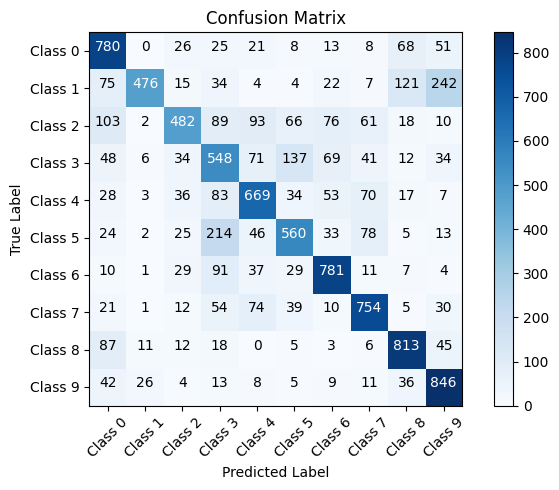

In [68]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_original3, y_pred_original3)

# Calculate accuracy score
accuracy = accuracy_score(y_test_original3, y_pred_original3)

# Print accuracy score
print("Accuracy:", accuracy)

# Visualize confusion matrix
plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numerical values in each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [48]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:06d}.hdf5'
last_finished_epoch = None

In [49]:
# save weights to file
model2.save_weights("weights2.h5")

In [50]:
# load weights from file (can call without model.fit)
model2.load_weights("weights2.h5")

In [66]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test_original3, y_pred_original3))


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.90      0.48      0.62      1000
           2       0.71      0.48      0.58      1000
           3       0.47      0.55      0.51      1000
           4       0.65      0.67      0.66      1000
           5       0.63      0.56      0.59      1000
           6       0.73      0.78      0.75      1000
           7       0.72      0.75      0.74      1000
           8       0.74      0.81      0.77      1000
           9       0.66      0.85      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



After using Data Augmentation methods:

    . rotation_range=10,

    . width_shift_range=0.1,

    . height_shift_range=0.1,

    . horizontal_flip=True

We can clearly see we got better results for f1-score and recall because we made samples of airplane and car balanced again also here precision got better.



#Part 4: The effect of regularization methods in the education process

---



In [51]:
from keras.layers import BatchNormalization


In [52]:
def make_model():
    #cnn
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())

    # model.add(Conv2D(32, (3, 3), padding='same'))
    # model.add(LeakyReLU(0.1))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
 
    # model.add(Conv2D(32, (3, 3), padding='same'))
    # model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #dense
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [53]:
model3 = make_model()


In [54]:
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:

model3.fit(x_train2, y_train2, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.4540 - accuracy: 0.5094
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0586 - accuracy: 0.6317
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9386 - accuracy: 0.6732
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8201 - accuracy: 0.7146
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7010 - accuracy: 0.7546
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5794 - accuracy: 0.7964
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4731 - accuracy: 0.8330
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3950 - accuracy: 0.8609
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3355 - accuracy: 0.8826
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - lo

In [56]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:07d}.hdf5'
last_finished_epoch = None

In [57]:
# save weights to file
model3.save_weights("weights.h5")

In [58]:
# load weights from file (can call without model.fit)
model3.load_weights("weights.h5")

In [61]:
y_pred1 = model3.predict(x_test2)
y_test_original4 = np.argmax(y_test2, axis=1)
y_pred_original4 = np.argmax(y_pred1, axis=1)


313/313 [==============================] - 1s 2ms/step


In [62]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test_original4, y_pred_original4))


Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.88      0.80      0.84      1000
           2       0.63      0.61      0.62      1000
           3       0.57      0.48      0.52      1000
           4       0.69      0.67      0.68      1000
           5       0.60      0.67      0.63      1000
           6       0.74      0.82      0.78      1000
           7       0.78      0.78      0.78      1000
           8       0.80      0.84      0.82      1000
           9       0.81      0.78      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In part 1 we had f1 - 0.75 and recall - 0.84 but here by using `droup-out` and `Batch Normalization`, we see f1 score increased to 0.79. here also we get better Precition result increased from 0.68 -> 0.81 and also all accuracy results got better from around 0.69 to 0.72.

Note we could get also better if we add more layers of droup out and batch normalization.